In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,losses
import numpy as np
from PIL import Image
from IPython.display import display

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10) ])

model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc*100:.2f}%")

Epoch 1/5
1563/1563 [==============================] - 43s 26ms/step - loss: 1.5215 - accuracy: 0.4444 - val_loss: 1.2777 - val_accuracy: 0.5551
Epoch 2/5
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1460 - accuracy: 0.5957 - val_loss: 1.0699 - val_accuracy: 0.6229
Epoch 3/5
1563/1563 [==============================] - 46s 30ms/step - loss: 0.9955 - accuracy: 0.6506 - val_loss: 0.9938 - val_accuracy: 0.6516
Epoch 4/5
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8939 - accuracy: 0.6871 - val_loss: 0.9759 - val_accuracy: 0.6608
Epoch 5/5
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8254 - accuracy: 0.7112 - val_loss: 0.9405 - val_accuracy: 0.6695
313/313 - 3s - loss: 0.9405 - accuracy: 0.6695 - 3s/epoch - 9ms/step
Test accuracy: 66.95%


In [4]:
def predict_new_image(image_path, model):
    img = Image.open(image_path)
    img = img.resize((32, 32))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions[0])
    return class_index

Enter Image Name:2


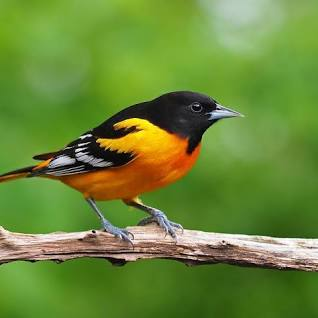

1/1 [==============================] - 0s 24ms/step
Image Predicted As Bird


In [6]:
num = input('Enter Image Name:')
image_path = f'Sample {num}.jpg'
display(Image.open(image_path))
class_index= predict_new_image(image_path, model)
l=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print('Image Predicted As', l[class_index].title())